In [27]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [28]:
music_data = data.MusicDataProvider()

Iter 00, logit: -7.202692
Iter 40, logit: -6.098567
Iter 80, logit: -6.090356
Iter 120, logit: -6.088232
Iter 160, logit: -6.087427
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
Iter 40, logit: -5.417342
Iter 80, logit: -5.008441
Iter 120, logit: -4.779820
Iter 160, logit: -4.636587
(700, 125)
Classifier train accuracy is 0.7871428571428571
(300, 125)
Classifier test accuracy is 0.6066666666666667
Label accuracy is 0.8042857142857143
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.202938
Average Raykar weight is 0.05
Iter 40, logit: -6.022261
Average Raykar weight is 0.11714285714285715
Iter 80, logit: -5.977279
Average Raykar weight is 0.10428571428571429
Iter 120, logit: -5.948555
Average Raykar weight is 0.10571428571428572


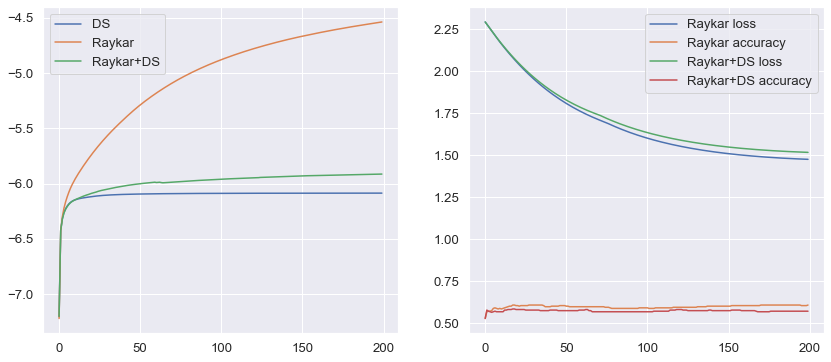

In [29]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300)

Number of data points: 700


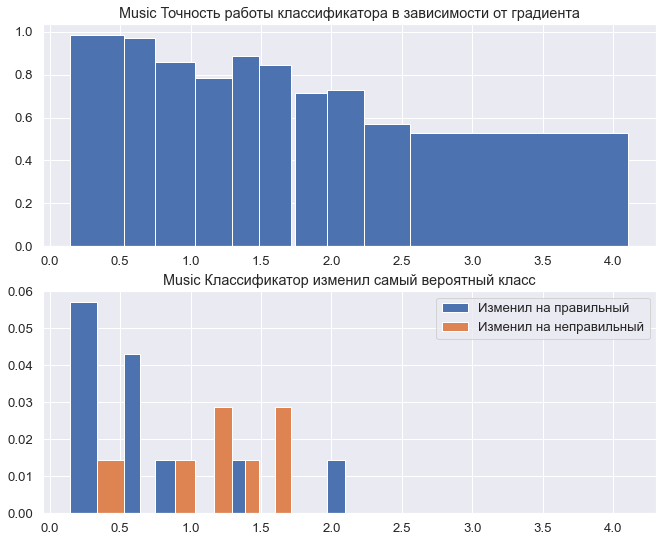

In [4]:
buckets, confidences, wrong, correct = bm.build_grad_hist(music_data, music_methods, music_points, 'Music', 70);
confidence_music = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.202692
Iter 40, logit: -6.098567
Iter 80, logit: -6.090356
Iter 120, logit: -6.088232
Iter 160, logit: -6.087427
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
Iter 40, logit: -5.417342
Iter 80, logit: -5.008441
Iter 120, logit: -4.779820
Iter 160, logit: -4.636587
(700, 125)
Classifier train accuracy is 0.7871428571428571
(300, 125)
Classifier test accuracy is 0.6066666666666667
Label accuracy is 0.8042857142857143
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.214359
Average Raykar weight is 0.7246734693877551
Iter 40, logit: -5.626081
Average Raykar weight is 0.5931836734693877
Iter 80, logit: -5.233055
Average Raykar weight is 0.658530612244898
Iter 120, logit: -4.981081
Average Raykar weight is 0.7147755

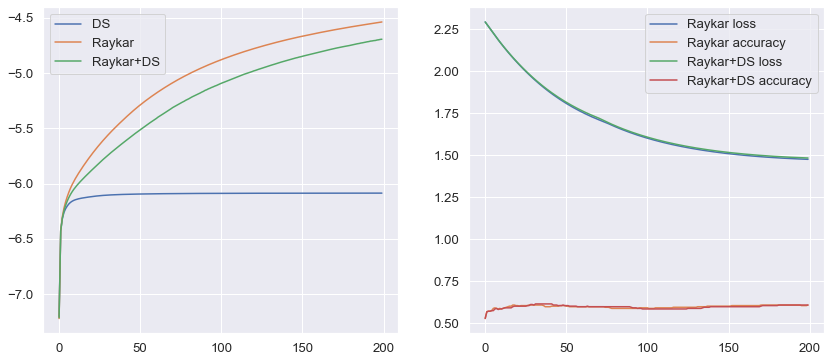

In [5]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300, 
                                                                    confidence_estimator=confidence_music)

In [6]:
music_points[music_points.task.isin(advantages_matrix[0][1])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
507,pop.00024.mp3,"[0.298, 0.0, 0.014, 0.203, 0.066, 0.068, 0.0, ...","[-2.632, -52.363, -5.761, -3.01, -4.09, -4.22,...","[0.121, 0.0, 0.01, 0.545, 0.0, 0.0, 0.0, 0.324...","[-3.009, -170.373, -4.47, -2.711, -64.176, -14...","[0.106, 0.021, 0.037, 0.353, 0.035, 0.027, 0.0...","[0.74001, 0.53816, 0.56168, 0.56754, 0.54146, ...","[0.135, 0.0, 0.014, 0.57, 0.0, 0.0, 0.0, 0.281...","[-2.917, -144.9, -4.498, -2.713, -50.313, -107...","[0.1, 0.021, 0.038, 0.379, 0.035, 0.028, 0.009...",0.75883,"[0.857, 0.143]",507
649,rock.00030.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.377, 0.0, 0.0...","[-inf, -inf, -inf, -inf, -inf, -inf, -7.894, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.975, 0.0, 0.0...","[-inf, -inf, -inf, -inf, -inf, -inf, -7.022, -...","[0.096, 0.013, 0.096, 0.138, 0.185, 0.043, 0.1...","[1.85416, 1.71255, 2.16949, 2.43079, 2.54464, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.901, 0.0, 0.0...","[-inf, -inf, -inf, -inf, -inf, -inf, -7.05, -i...","[0.095, 0.014, 0.098, 0.136, 0.187, 0.044, 0.1...",2.72266,"[0.529, 0.471]",649


Annotation(annotator='A1G05O3HM7DNVZ', task='blues.00084.mp3', value='pop')
Annotation(annotator='AL12RG9EJZ60', task='blues.00084.mp3', value='country')
Annotation(annotator='AK0F484W5TBJ4', task='blues.00084.mp3', value='classical')


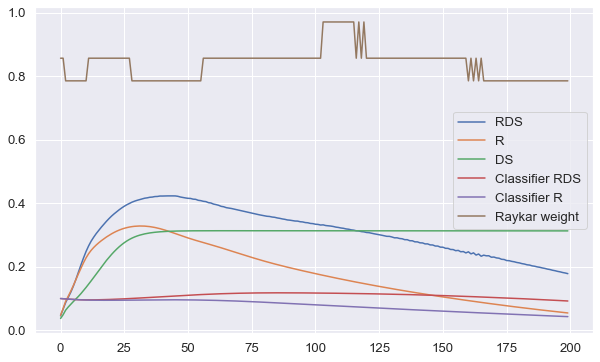

In [7]:
bm.plots_for_point(music_points, music_data, music_methods, 58)

In [8]:
reload_all()
bm.boosting_classifiers_distr(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])

TypeError: boosting_classifiers_distr() missing 1 required positional argument: 'name'

In [ ]:
music_points.classifier_rb.loc[507]

In [ ]:
reload_all()
bm.plot_all_gradients(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])

In [ ]:
plt.plot(music_methods[1].accuracies)
plt.plot(music_methods[2].accuracies)

In [ ]:
max(music_methods[1].accuracies), max(music_methods[2].accuracies)

(0.5166666666666667, 0.5333333333333333)

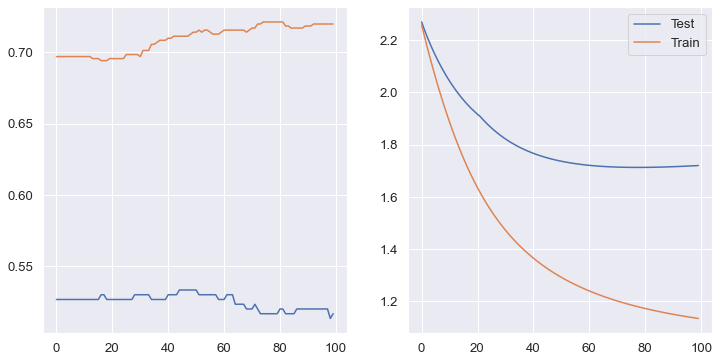

In [26]:
reload_all()
bm.run_mv_classifier(music_data, iters=100, n_classes=10, lr=1000, hard=False)

(0.7066666666666667, 0.72)

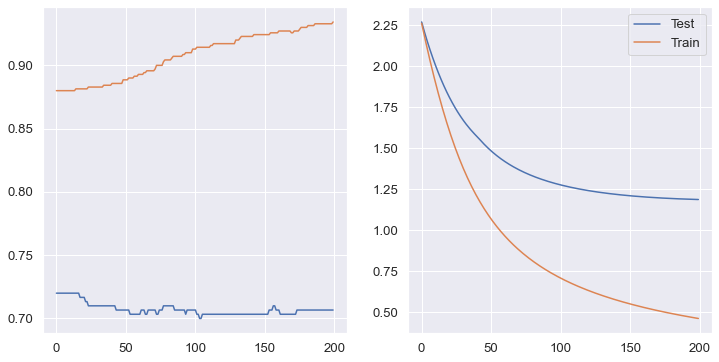

In [31]:
reload_all()
bm.run_mv_classifier(music_data, iters=200, n_classes=10, lr=500, hard=True)